In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
odds2021 = pd.read_csv('preseason odds/2021odds.csv')
odds2020 = pd.read_csv('preseason odds/2020odds.csv')
odds2019 = pd.read_csv('preseason odds/2019odds.csv')
odds2018 = pd.read_csv('preseason odds/2018odds.csv')
odds2017 = pd.read_csv('preseason odds/2017odds.csv')
odds2016 = pd.read_csv('preseason odds/2016odds.csv')
odds2015 = pd.read_csv('preseason odds/2015odds.csv')
odds2014 = pd.read_csv('preseason odds/2014odds.csv')
odds2013 = pd.read_csv('preseason odds/2013odds.csv')
odds2012 = pd.read_csv('preseason odds/2012odds.csv')
odds2011 = pd.read_csv('preseason odds/2011odds.csv')
odds2010 = pd.read_csv('preseason odds/2010odds.csv')
odds2009 = pd.read_csv('preseason odds/2009odds.csv')
odds2008 = pd.read_csv('preseason odds/2008odds.csv')
odds2007 = pd.read_csv('preseason odds/2007odds.csv')
odds2006 = pd.read_csv('preseason odds/2006odds.csv')
odds2005 = pd.read_csv('preseason odds/2005odds.csv')
odds2004 = pd.read_csv('preseason odds/2004odds.csv')
odds2003 = pd.read_csv('preseason odds/2003odds.csv')
odds2002 = pd.read_csv('preseason odds/2002odds.csv')
odds2001 = pd.read_csv('preseason odds/2001odds.csv')
odds2000 = pd.read_csv('preseason odds/2000odds.csv')

In [3]:
def clean_df(x):
    results = x['Result']
    wins = []
    for result in results:
        wins.append(int(result.split('-')[0]))
    short_names = []
    names = x['Team']
    for team in names:
        short_names.append(team.split(' ')[-1])
    x['Result'] = wins
    x['Team'] = short_names
    x = x.drop('Unnamed: 2', axis=1)
    x = x.rename(columns={'W-L O/U':'PredictedWins'})
    x['Difference'] = x['PredictedWins'] - x['Result']
    x = x.sort_values(by='Difference', ascending=False).reset_index(drop=True)
    return x

In [4]:
odds2021 = clean_df(odds2021)
odds2020 = clean_df(odds2020)
odds2019 = clean_df(odds2019)
odds2018 = clean_df(odds2018)
odds2017 = clean_df(odds2017)
odds2016 = clean_df(odds2016)
odds2015 = clean_df(odds2015)
odds2014 = clean_df(odds2014)
odds2013 = clean_df(odds2013)
odds2012 = clean_df(odds2012)
odds2011 = clean_df(odds2011)
odds2010 = clean_df(odds2010)
odds2009 = clean_df(odds2009)
odds2008 = clean_df(odds2008)
odds2007 = clean_df(odds2007)
odds2006 = clean_df(odds2006)
odds2005 = clean_df(odds2005)
odds2004 = clean_df(odds2004)
odds2003 = clean_df(odds2003)
odds2002 = clean_df(odds2002)
odds2001 = clean_df(odds2001)
odds2000 = clean_df(odds2000)

In [5]:
def add_year(df, year):
    df['Team'] = year + ' ' + df['Team']

In [6]:
add_year(odds2000, '2000')
add_year(odds2001, '2001')
add_year(odds2002, '2002')
add_year(odds2003, '2003')
add_year(odds2004, '2004')
add_year(odds2005, '2005')
add_year(odds2006, '2006')
add_year(odds2007, '2007')
add_year(odds2008, '2008')
add_year(odds2009, '2009')
add_year(odds2010, '2010')
add_year(odds2011, '2011')
add_year(odds2012, '2012')
add_year(odds2013, '2013')
add_year(odds2014, '2014')
add_year(odds2015, '2015')
add_year(odds2016, '2016')
add_year(odds2017, '2017')
add_year(odds2018, '2018')
add_year(odds2019, '2019')
add_year(odds2020, '2020')
add_year(odds2021, '2021')

In [7]:
all_years = [odds2000, odds2001, odds2002, odds2003, odds2004, odds2005, odds2006, odds2007, odds2008, odds2009, odds2010,
            odds2011, odds2012, odds2013, odds2014, odds2015, odds2016, odds2017, odds2018, odds2019, odds2020, odds2021]

In [8]:
full_df = pd.concat(all_years)

In [9]:
full_df_clean = full_df.loc[full_df['PredictedWins'] > 50]

In [10]:
full_df_sort = full_df_clean.sort_values(by='Difference', ascending=False).reset_index(drop=True)

In [11]:
full_df_sort['Team'][8] = '2004 T-Wolves'

<ipython-input-11-f48dd1ae7426>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_sort['Team'][8] = '2004 T-Wolves'


Text(0.5, 1.0, 'Greatest Differences in Predicted Wins vs Final Wins Since 2000(Min 50 wins)')

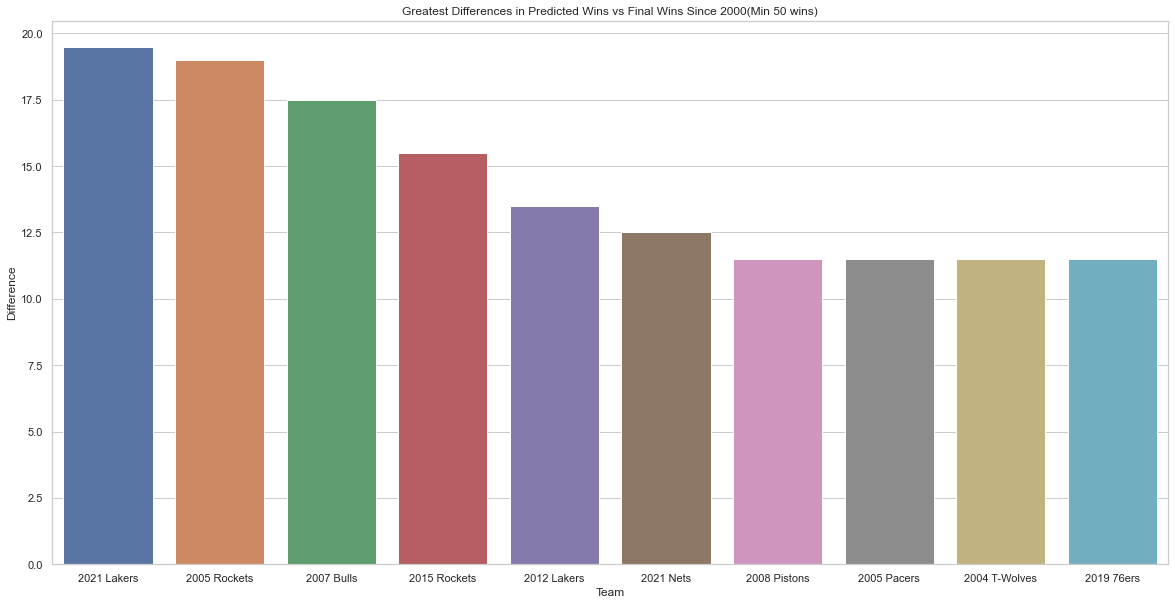

In [15]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Team', y='Difference', data=full_df_sort[:10])
plt.title('Greatest Differences in Predicted Wins vs Final Wins Since 2000(Min 50 wins)')